In [28]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

In [29]:
df = pd.read_csv('data/Vix_Returns.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df_vx = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']]
# Get rid of rows with 'ND' as value
#df = df[df['1-month'] != 'ND']
#df = df.astype(float)
# To see how the data looks like
df_vx.head()

,F1,F2,F3,F4,F5,F6,F7
Date,,,,,,,
2011-02-07,16.95,18.45,19.60,20.40,21.15,21.95,22.50
2011-02-08,16.85,18.20,19.35,20.05,20.85,21.65,22.15
2011-02-09,16.85,18.25,19.30,20.05,20.80,21.60,22.10
2011-02-10,16.90,18.30,19.30,19.95,20.60,21.30,21.75
2011-02-11,16.60,18.05,19.15,19.85,20.45,21.15,21.55


In [30]:
volatilities = df_vx.std()
volatilities

F1    5.062943
F2    4.417086
F3    4.162873
F4    4.023538
F5    4.027038
F6    4.013676
F7    4.018265
dtype: float64

In [31]:
df_returns = df_vx.pct_change()[1:]
# Remove inf and NaN values in the dataframe
#df_returns = df_returns.replace([np.inf, -np.inf], np.nan)
#df_returns = df_returns.dropna(axis=0,how='any')
# To see how the returns looks like
df_returns.head()

,F1,F2,F3,F4,F5,F6,F7
Date,,,,,,,
2011-02-08,-0.005900,-0.013550,-0.012755,-0.017157,-0.014184,-0.013667,-0.015556
2011-02-09,0.000000,0.002747,-0.002584,0.000000,-0.002398,-0.002309,-0.002257
2011-02-10,0.002967,0.002740,0.000000,-0.004988,-0.009615,-0.013889,-0.015837
2011-02-11,-0.017751,-0.013661,-0.007772,-0.005013,-0.007282,-0.007042,-0.009195
2011-02-14,-0.009036,-0.011080,-0.010444,-0.005038,-0.002445,-0.002364,-0.002320


In [32]:
#df['pct_change'] = df.pct_change()
df_log = np.log(1 + df_returns)
df_log.head()

,F1,F2,F3,F4,F5,F6,F7
Date,,,,,,,
2011-02-08,-0.005917,-0.013643,-0.012837,-0.017306,-0.014286,-0.013762,-0.015678
2011-02-09,0.000000,0.002743,-0.002587,0.000000,-0.002401,-0.002312,-0.002260
2011-02-10,0.002963,0.002736,0.000000,-0.005000,-0.009662,-0.013986,-0.015964
2011-02-11,-0.017911,-0.013755,-0.007802,-0.005025,-0.007308,-0.007067,-0.009238
2011-02-14,-0.009077,-0.011142,-0.010499,-0.005051,-0.002448,-0.002367,-0.002323


In [33]:
volatilities_log = df_log.std()
volatilities_log

F1    0.056376
F2    0.039503
F3    0.030572
F4    0.025757
F5    0.022508
F6    0.020481
F7    0.018783
dtype: float64

In [34]:
corr_matrix = df_log.corr()
# To show how the correlation matrix looks like
corr_matrix

,F1,F2,F3,F4,F5,F6,F7
F1,1.000000,0.950238,0.924661,0.902158,0.873622,0.856629,0.837134
F2,0.950238,1.000000,0.977403,0.958974,0.939223,0.920642,0.902516
F3,0.924661,0.977403,1.000000,0.979628,0.965099,0.952986,0.939573
F4,0.902158,0.958974,0.979628,1.000000,0.979728,0.968560,0.960191
F5,0.873622,0.939223,0.965099,0.979728,1.000000,0.980003,0.970262
F6,0.856629,0.920642,0.952986,0.968560,0.980003,1.000000,0.975825
F7,0.837134,0.902516,0.939573,0.960191,0.970262,0.975825,1.000000


In [35]:
eig_values, eig_vectors = np.linalg.eigh(corr_matrix)
# Make a list of (eigenvalue, eigenvector) tuples, and sort them by 
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Show the first three eigenvectors:
eig_pairs[0:3]

[(6.6354305295947213,
  array([-0.3610941 , -0.37870782, -0.3839664 , -0.38459115, -0.38228688,
         -0.37925903, -0.37532682])),
 (0.23859741182990149,
  array([-0.70020617, -0.34764303, -0.10018762,  0.08397891,  0.25181701,
          0.34806832,  0.43266877])),
 (0.049431280660317316,
  array([ 0.58960386, -0.44570655, -0.42770461, -0.23076778, -0.06751305,
          0.21429512,  0.4087145 ]))]

In [36]:
#Gamma is given by N/T, where N is the number of iid random variables
gamma = float(df_log.shape[1])/float(df_log.shape[0])
mp_value_pos = (1 + math.sqrt(gamma))**2
mp_value_neg = (1 - math.sqrt(gamma))**2
print mp_value_pos, mp_value_neg

1.1413900826 0.867955711791


In [37]:
# Find out the significant eigenvalue and eigenvectors pairs
sig_eig_pairs = [(val, vec) for val, vec in eig_pairs if val > mp_value_pos]
sig_eig_pairs

[(6.6354305295947213,
  array([-0.3610941 , -0.37870782, -0.3839664 , -0.38459115, -0.38228688,
         -0.37925903, -0.37532682]))]

In [52]:
weights = np.array(eig_pairs[0][1])/np.array(df_log.std())
weights = weights/math.sqrt(eig_pairs[0][0])
df_value_first_eigenportfolio = df_log.dot(weights)
#df_returns_first_eigenportfolio = df_value_first_eigenportfolio.pct_change()[1:]*100
#returns_first_eigen_portfolio.append(df_returns_first_eigenportfolio)

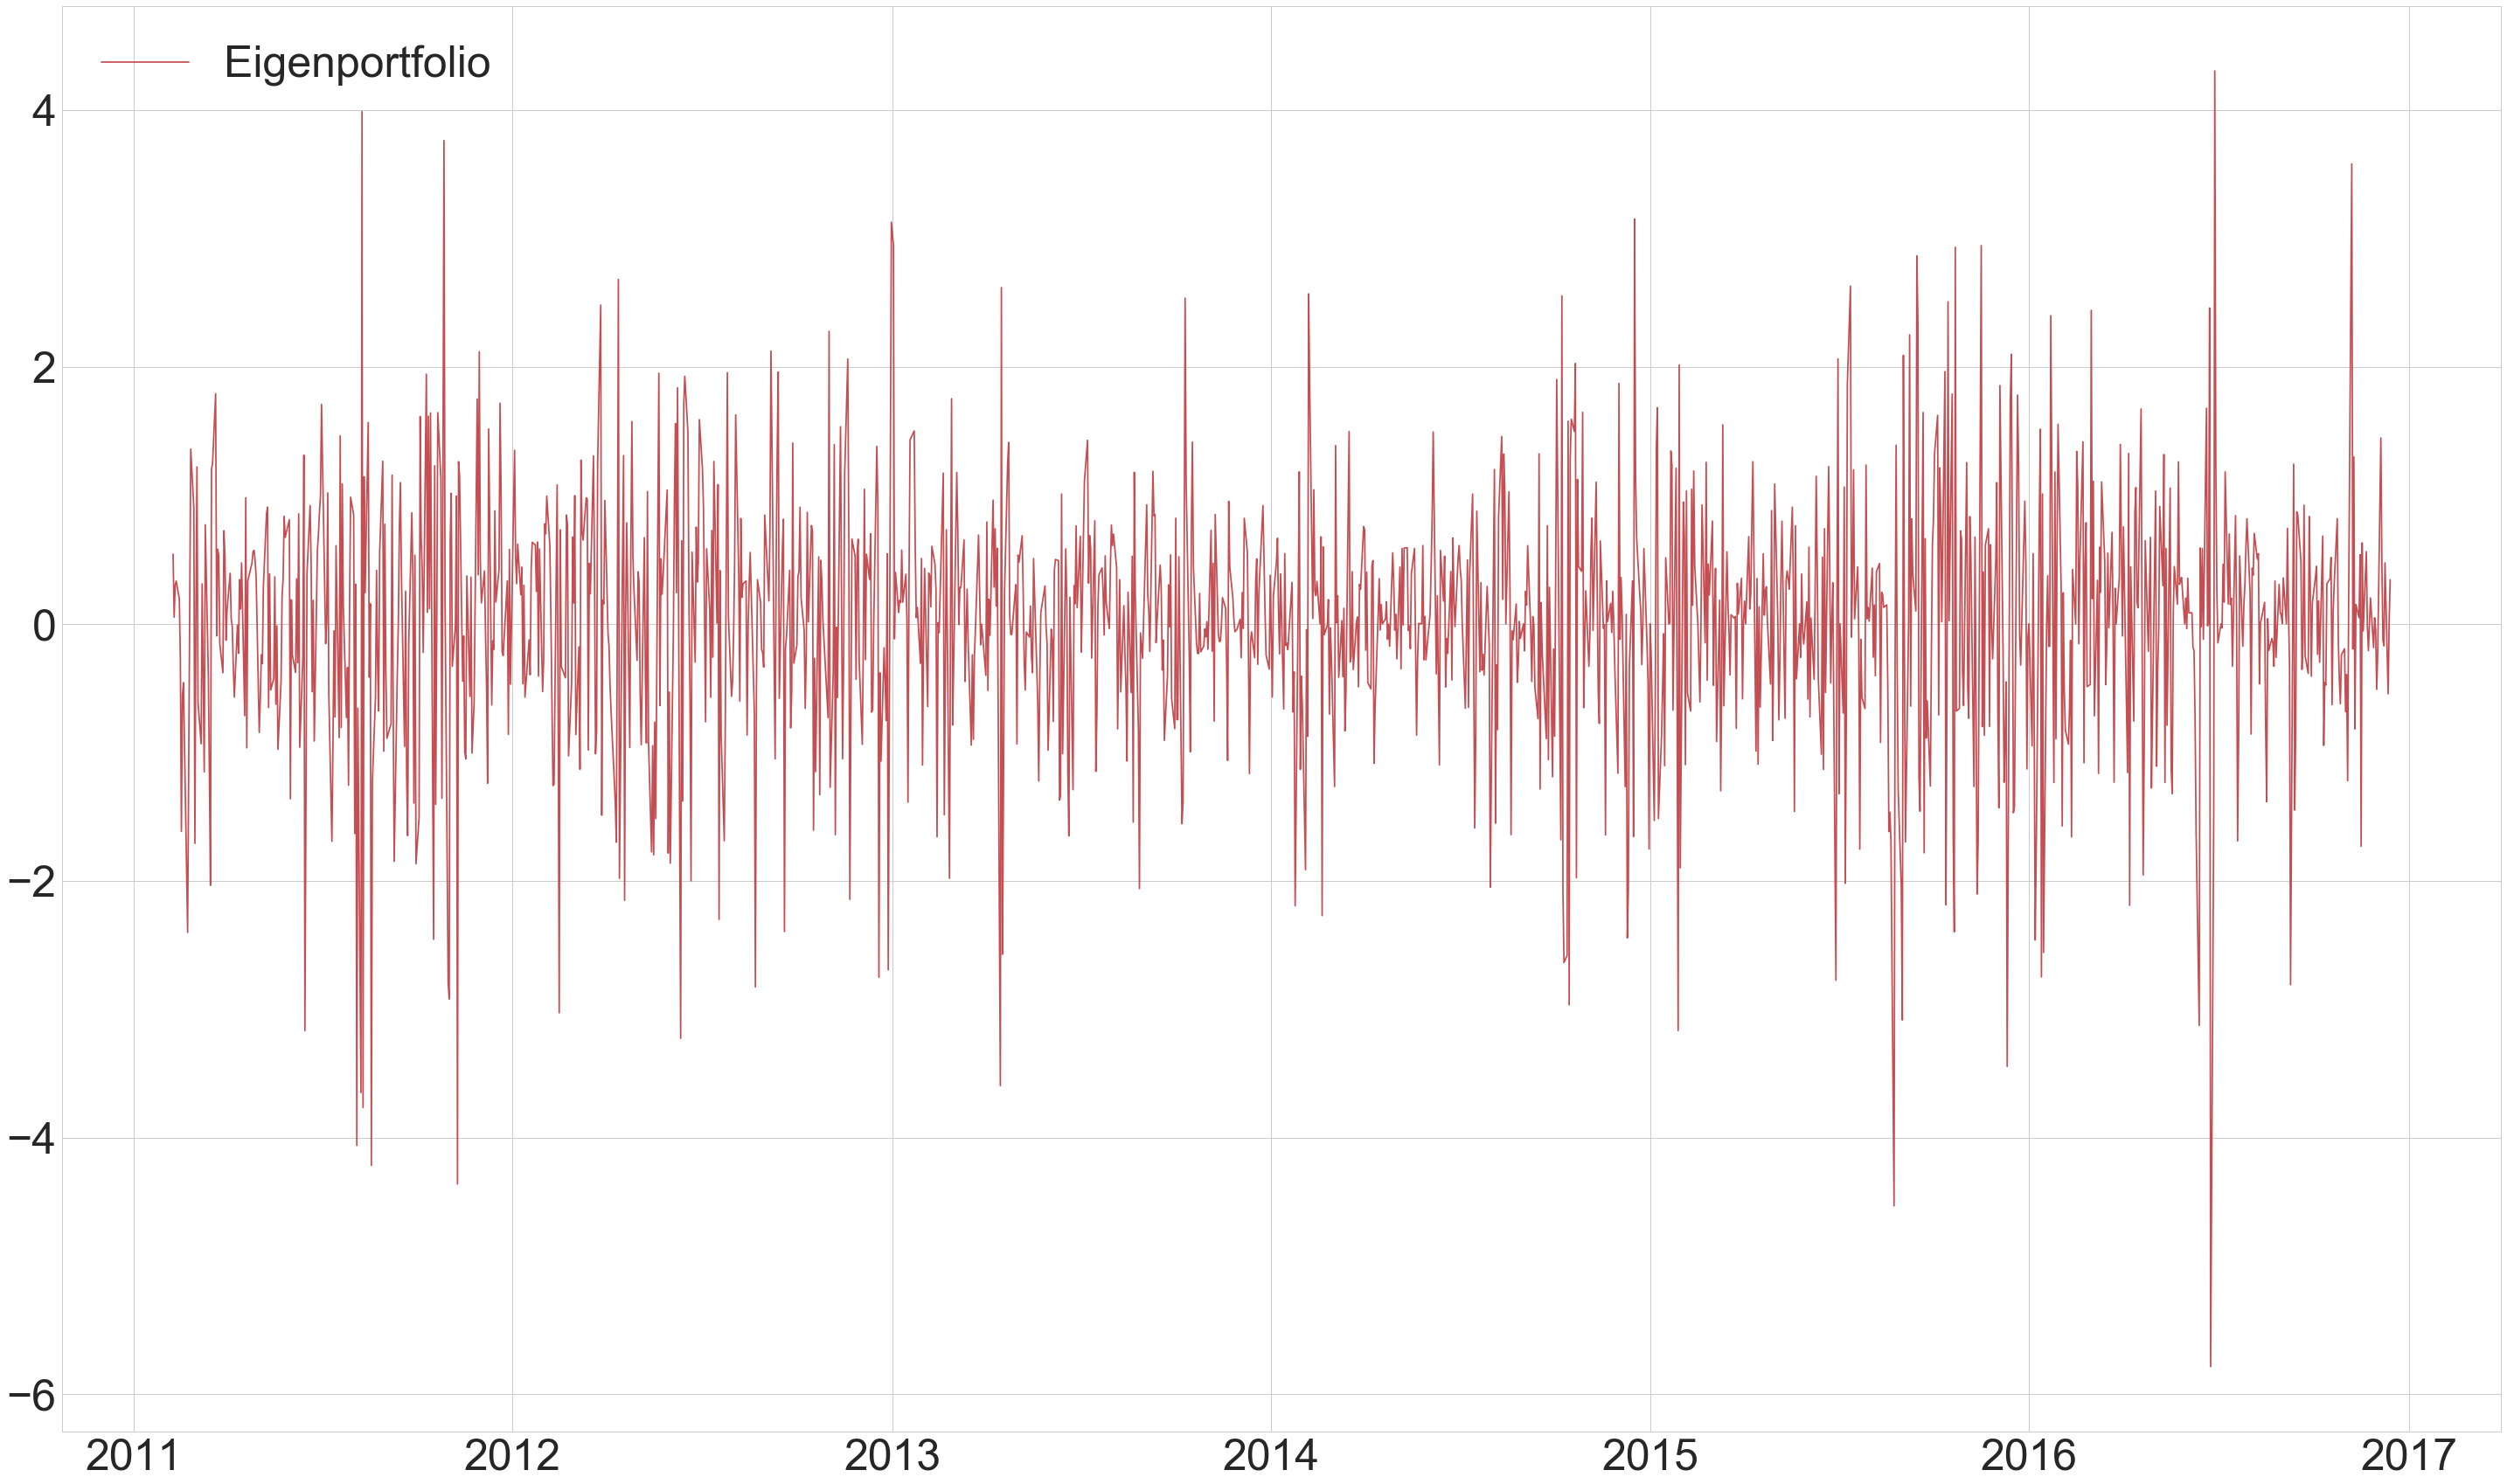

In [53]:
sns.set(font_scale=5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(50,30))
                       
ax.plot(df_value_first_eigenportfolio, label='Eigenportfolio', color='r')
#ax.plot(df['vix']/df['vix'].std(), label='VIX', color='b')
plt.legend(loc='best')                      
#plt.plot(df_value_first_eigenportfolio)
plt.show()

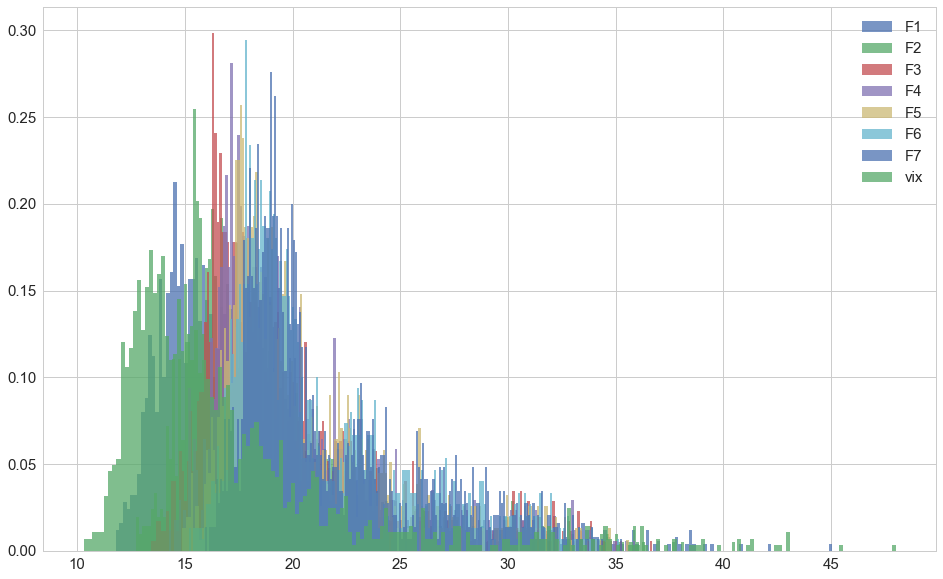

In [75]:
df_vix_vx = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'vix']]
df_vix_vx = df_vix_vx.replace([np.inf, -np.inf], np.nan)
df_vix_vx = df_vix_vx.dropna(axis=0,how='any')

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16,10))

labels = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'vix']
#labels = ['F7']

for label in labels:
#df_vix_vx.hist(ax=ax, bins=200, alpha=0.75, normed=True)
    plt.hist(df[label], bins=200, alpha=0.75, label=label, normed=True)

plt.legend(loc='best')
plt.show()
#df_vix_vx.dtypes

In [76]:
df_vix_vx.mode()

,F1,F2,F3,F4,F5,F6,F7,vix
0,14.2,15.55,16.45,17.1,17.7,17.85,18.45,13.79
1,15.5,NaN,NaN,NaN,NaN,NaN,19.00,NaN


In [80]:
df.dtypes

F1        float64
F2        float64
F3        float64
F4        float64
F5        float64
F6        float64
F7        float64
F8        float64
vix       float64
F1_exp      int64
F2_exp      int64
F3_exp      int64
F4_exp      int64
F5_exp      int64
F6_exp      int64
F7_exp      int64
F8_exp      int64
dtype: object

df['F_20'] = df.apply(lambda row: np.interp(20, row[['F1_exp','F2_exp', 'F3_exp', 'F4_exp','F5_exp',
                                                     'F6_exp','F7_exp']], row[['F1', 'F2',
                                                                                         'F3', 'F4', 
                                                                                         'F5', 'F6', 
                                                                                         'F7']]), axis=1)
df.head()

In [ ]:
Calculate constant tenors
calculate new volatilities sigma
calc vinf and kappa from eq 4
calc eq 5
